In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.utils import io
from PyEyeSim import EyeData

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
Path='C:/Users/Utente/Documents/University/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0, dtype={'subject': str})
print(np.shape(FixData))

(265703, 12)


In [4]:
# delete every row where the repetition is not 0 and record_number is not 0
FixData=FixData[FixData['repetition']==0]
FixData=FixData[FixData['record_number']==0]
print(np.shape(FixData))

(258562, 12)


dataset size:  (258562, 12)
presentation size:  x= 1920 pixels y= 1080  pixels
presentation size:  x= 1920 pixels y= 1080  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 200 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction


C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\__init__.py:281: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


run descriptive analysis
Data for  200 observers and  36  stimuli.
Mean fixation number:  36.89  +/-  9.95
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  476.5  +/-  92.1  pixels
Mean Y location:  465.2  +/-  65.3  pixels
Mean saccade  amplitude:  79.9  +/-  19.2  pixels
Mean scanpath  length:  2482.0  +/-  566.8  pixels
Data for  200 observers and  36  stimuli.
Mean fixation number:  36.89  +/-  9.95
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  476.5  +/-  92.1  pixels
Mean Y location:  465.2  +/-  65.3  pixels
Mean saccade  amplitude:  79.9  +/-  19.2  pixels
Mean scanpath  length:  2482.0  +/-  566.8  pixels


(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30, 8881, 8882, 8883,
        8884, 8885, 8886], dtype=int64),
 array(['21418', '21422', '21463', '21468', '21469', '21474', '21480',
        '21498', '21513', '21522', '21526', '21531', '21568', '21629',
        '21630', '21636', '21641', '21653', '21658', '21667', '21680',
        '21683', '21685', '21699', '21706', '21735', '21774', '21811',
        '21819', '21820', '21862', '21878', '21889', '21927', '21930',
        '21939', '21946', '22018', '22036', '22108', '22109', '22127',
        '22129', '22138', '22149', '22168', '22174', '22180', '22181',
        '22186', '22204', '22214', '22219', '22228', '22234', '22239',
        '22242', '22261', '22271', '22279', '22291', '22322', '22324',
        '22327', '22341', '22346', '22376', '22378', '22383', '22388',
        '22394', '22410', '

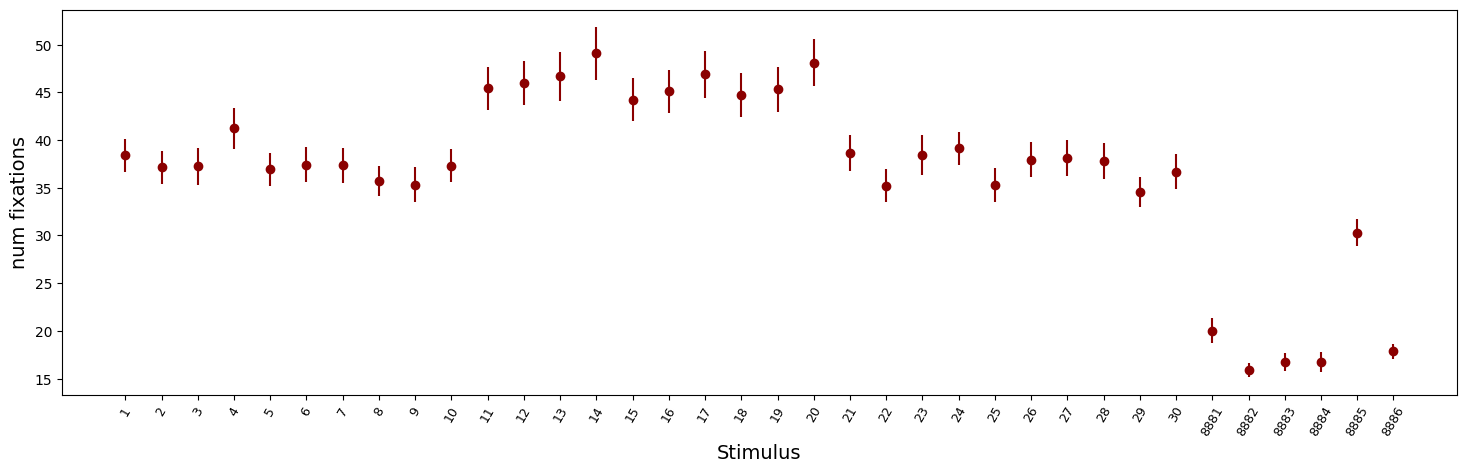

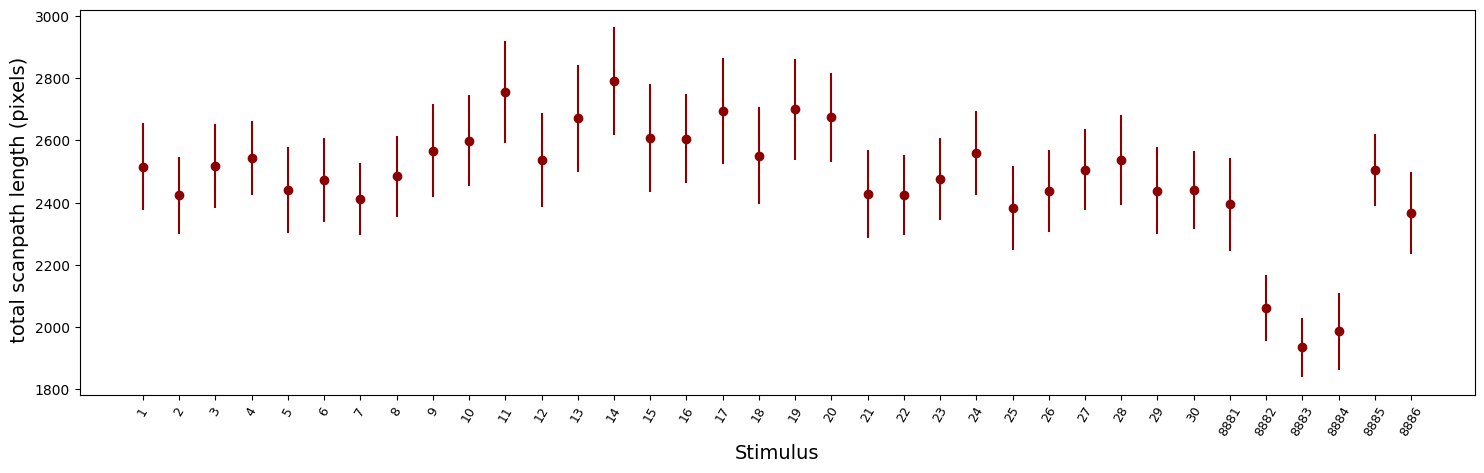

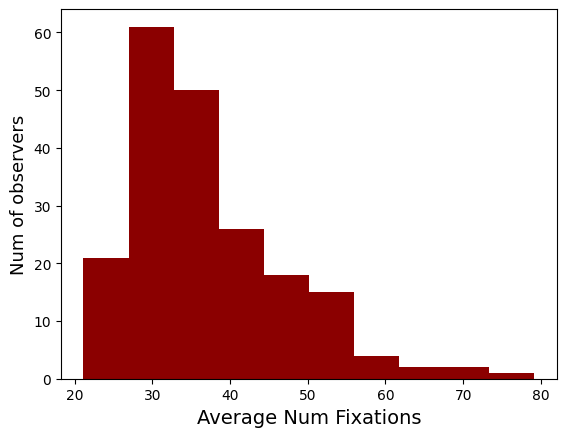

In [5]:

#sizeX,sizeY=1024, 768 
sizeX,sizeY=1920, 1080


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')
DyslexiaDat.RunDescriptiveFix(Visual=1)

---

In [6]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [7]:
WhichC

array([ 0.,  3.,  3.,  2.,  2.,  2.,  1.,  3.,  3.,  3.,  1.,  2.,  2.,
        2.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  2.,  0.,  0.,  0.,
        3.,  0.,  3.,  3.,  2.,  3., nan,  0.,  0.,  3.,  3.,  1.,  0.,
        0.,  1.,  0.,  3.,  0.,  1.,  2.,  0.,  1.,  3.,  0.,  3.,  2.,
        1.,  1.,  1.,  0.,  3.,  0.,  0.,  0.,  1.,  2.,  3.,  3.,  0.,
        1.,  3.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  2.,  1.,  3.,
        1.,  3.,  0.,  3.,  1.,  0.,  1.,  2.,  2.,  1.,  3.,  0.,  0.,
        2.,  2.,  0., nan,  0.,  3.,  3.,  1., nan,  3.,  3.,  3.,  2.,
        3.,  1.,  1.,  0.,  3.,  3.,  3.,  3.,  3.,  3.,  2.,  0.,  0.,
        2.,  3.,  1.,  2.,  2.,  3.,  2.,  3.,  3.,  3.,  2.,  3.,  3.,
        0.,  1.,  0.,  2.,  0.,  2.,  2.,  2.,  2.,  3.,  2.,  2.,  1.,
        3.,  3.,  2.,  1.,  3.,  0.,  0., nan,  3.,  0.,  3.,  0.,  3.,
        3.,  3.,  3.,  2.,  0.,  0.,  3.,  2.,  2.,  2.,  0.,  1.,  3.,
        1.,  2.,  0.,  3.,  3.,  2.,  2.,  2.,  1.,  3.,  3.,  3

---

In [21]:
complete_data = []
missing_data = {}
subject_with_missing_data = {}
set_subj = set()
for i in range(0,36):
    FixGr=np.array(DyslexiaDat.nfix[0:117,i])
    if not np.isnan(FixGr).any():
        complete_data.append(i)
    if np.isnan(FixGr).any():
        missing_data[i] = np.isnan(FixGr).sum()
        for x in np.where(np.isnan(FixGr))[0]:
            subject_with_missing_data[x] = +1
            set_subj.add(x)


print(f'{len(complete_data)} Stimuli with complete data: {complete_data}')
print(f'{len(missing_data)} Stimuli with Missing data: {missing_data}')
print(f'Max subject that have not seen the stimulus: {max(missing_data.values())}')
print(f'{len(subject_with_missing_data)} Subjects with missing data: {subject_with_missing_data}')

10 Stimuli with complete data: [0, 3, 4, 5, 7, 15, 18, 28, 31, 32]
26 Stimuli with Missing data: {1: 1, 2: 1, 6: 1, 8: 1, 9: 1, 10: 3, 11: 3, 12: 2, 13: 3, 14: 1, 16: 2, 17: 1, 19: 2, 20: 1, 21: 1, 22: 1, 23: 1, 24: 2, 25: 1, 26: 2, 27: 1, 29: 1, 30: 1, 33: 1, 34: 2, 35: 3}
Max subject that have not seen the stimulus: 3
29 Subjects with missing data: {115: 1, 43: 1, 53: 1, 10: 1, 15: 1, 17: 1, 91: 1, 94: 1, 116: 1, 32: 1, 83: 1, 20: 1, 41: 1, 96: 1, 55: 1, 44: 1, 82: 1, 14: 1, 2: 1, 66: 1, 73: 1, 58: 1, 25: 1, 99: 1, 64: 1, 8: 1, 27: 1, 76: 1, 80: 1}


In [36]:
Munich_All = WhichC[:117]

In [50]:
Munich = []
for idx, group in enumerate(Munich_All):
    if idx not in set_subj:
        Munich.append(group)
Munich = np.array(Munich)

In [51]:
Munich

array([0., 3., 2., 2., 2., 1., 3., 3., 2., 2., 2., 0., 0., 0., 3., 2., 0.,
       0., 3., 3., 3., 2., 3., 0., 0., 3., 3., 1., 0., 0., 1., 3., 2., 0.,
       1., 3., 0., 3., 2., 1., 1., 3., 0., 0., 1., 2., 3., 3., 1., 1., 0.,
       1., 0., 0., 0., 2., 2., 3., 1., 3., 3., 1., 2., 2., 1., 3., 0., 0.,
       2., 0., 0., 3., 1., 3., 3., 3., 2., 3., 1., 1., 0., 3., 3., 3., 3.,
       3., 3., 2.])

In [52]:
len(Munich)

88

In [63]:
control = len(Munich[Munich == 2]) + len(Munich[Munich == 3])
dyselxic = len(Munich[Munich == 0]) + len(Munich[Munich == 1])

In [64]:
print(control)
print(dyselxic)

49
39


---

In [66]:
Graz = WhichC[117:200]
Graz = np.array(Graz)

In [67]:
Graz

array([ 2.,  3.,  1.,  2.,  2.,  3.,  2.,  3.,  3.,  3.,  2.,  3.,  3.,
        0.,  1.,  0.,  2.,  0.,  2.,  2.,  2.,  2.,  3.,  2.,  2.,  1.,
        3.,  3.,  2.,  1.,  3.,  0.,  0., nan,  3.,  0.,  3.,  0.,  3.,
        3.,  3.,  3.,  2.,  0.,  0.,  3.,  2.,  2.,  2.,  0.,  1.,  3.,
        1.,  2.,  0.,  3.,  3.,  2.,  2.,  2.,  1.,  3.,  3.,  3.,  3.,
        0.,  2., nan, nan,  2.,  1.,  3.,  3.,  3.,  3.,  3.,  0.,  0.,
        2.,  0.,  3.,  3., nan])

In [68]:
len(Graz)

83

In [69]:
control = len(Graz[Graz == 2]) + len(Graz[Graz == 3])
dyselxic = len(Graz[Graz == 0]) + len(Graz[Graz == 1])

In [70]:
print(control)
print(dyselxic)

56
23


In [80]:
control = len(Graz[Graz == 2]) + len(Graz[Graz == 3]) + len(Graz[np.isnan(Graz)])
print(control)

60
